# Visualizations

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# create path shortcut
path = r'C:\Users\lisag\Desktop\CF Work\Immersion 4 Tasks\Instacart (IC) Basket Analysis'

In [22]:
# import cleaned and complete data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'task_4.10_part_1.pkl')) 

In [24]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_24hour,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,STATE,Age,date_joined,n_dependants,fam_status,income,_merge,region,customer_profile,shopper_profile
0,2,202279,3,5,9,8.0,1819,8,1,All Natural No Stir Creamy Almond Butter,...,Idaho,57,2/6/2020,3,married,98119,both,Region 4,0,Mature High-Income
1,2,202279,3,5,9,8.0,40141,7,1,Original Unflavored Gelatine Mix,...,Idaho,57,2/6/2020,3,married,98119,both,Region 4,0,Mature High-Income
2,2,202279,3,5,9,8.0,33120,1,1,Organic Egg Whites,...,Idaho,57,2/6/2020,3,married,98119,both,Region 4,0,Mature High-Income
3,2,202279,3,5,9,8.0,17794,6,1,Carrots,...,Idaho,57,2/6/2020,3,married,98119,both,Region 4,0,Mature High-Income
4,2,202279,3,5,9,8.0,28985,2,1,Michigan Organic Kale,...,Idaho,57,2/6/2020,3,married,98119,both,Region 4,0,Mature High-Income


# Visualization #1

In [28]:
# getting values of each shopper profile by region
shopper_profile_by_region = df.groupby('region')['shopper_profile'].value_counts().unstack().fillna(0)

In [30]:
shopper_profile_by_region

shopper_profile,Young Low-Income,Mature High-Income,Parent of Baby,Pet Owner,Young Parent,Single Adult,Married Adult No Kids,Other
region,,,,,,,,
Region 1,0,3108021,45769,11025,794169,1418301,0,345451
Region 2,0,4084302,59762,12703,1075406,1905200,0,459952
Region 3,0,5792916,87391,19607,1537212,2701659,0,653095
Region 4,0,4466662,65062,15380,1170424,2072343,0,503042


In [52]:
filtered_shopper_profile_by_region = shopper_profile_by_region.drop(columns=['Young Low-Income', 'Married Adult No Kids'])

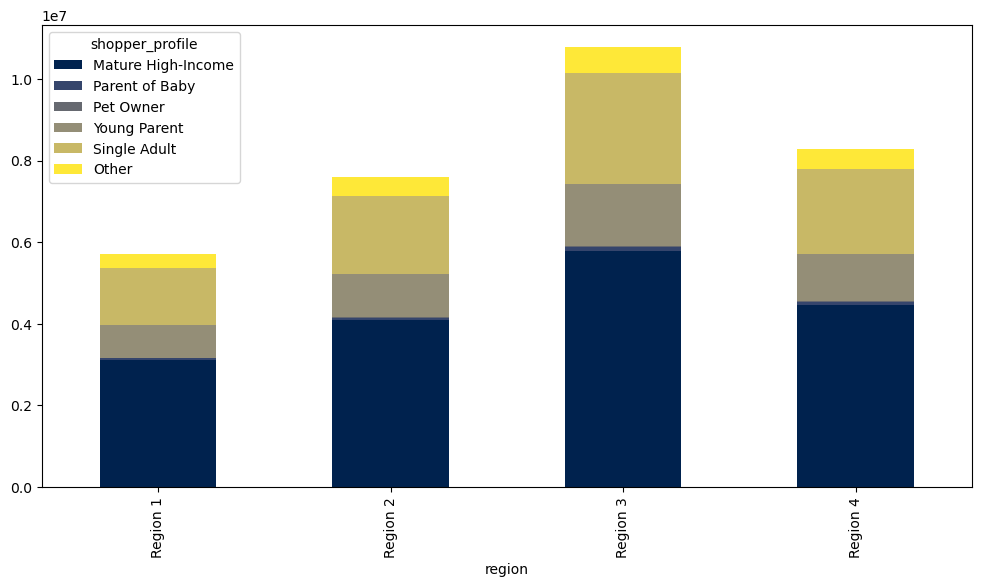

In [100]:
# stacked by chart for shopper_profile_by_region
stacked_bar = filtered_shopper_profile_by_region.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='cividis', 
    ax=plt.gca())

In [127]:
# remove scientific notation
stacked_bar.ticklabel_format(style='plain', axis='y')

AttributeError: This method only works with the ScalarFormatter

In [129]:
# setting y-axis
y_ticks = stacked_bar.get_yticks()

In [131]:
stacked_bar.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks])

C:\Users\lisag\AppData\Local\Temp\ipykernel_13184\3103078119.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  stacked_bar.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks])


[Text(0, 0.0, '0M'),
 Text(0, 2000000.0, '2M'),
 Text(0, 4000000.0, '4M'),
 Text(0, 6000000.0, '6M'),
 Text(0, 8000000.0, '8M'),
 Text(0, 10000000.0, '10M'),
 Text(0, 12000000.0, '12M')]

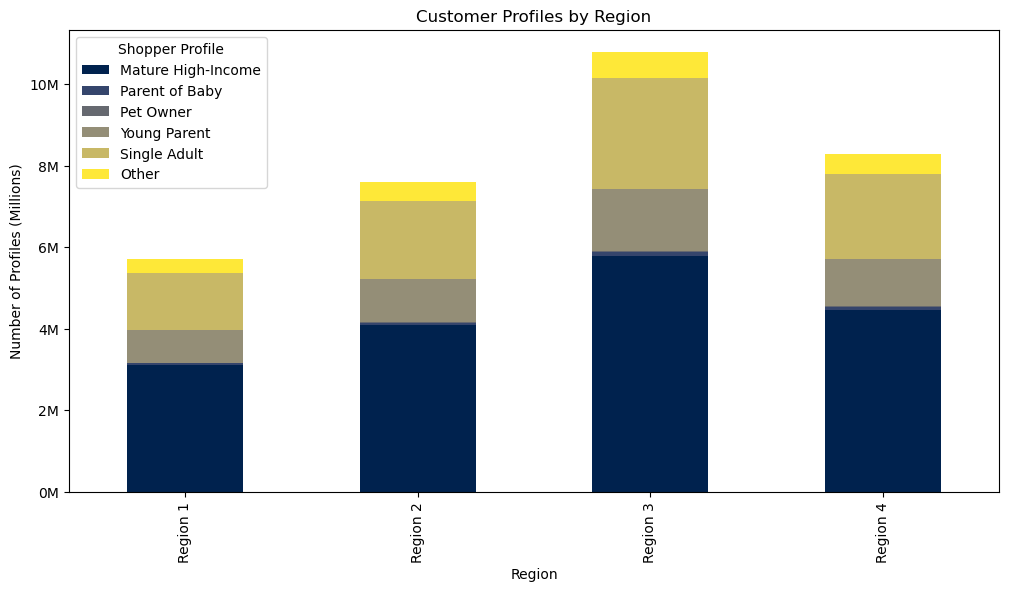

In [133]:
stacked_bar.figure

In [135]:
# add labels and titles
stacked_bar.set_xlabel('Region')
stacked_bar.set_ylabel('Number of Profiles (Millions)')
stacked_bar.set_title('Customer Profiles by Region')

Text(0.5, 1.0, 'Customer Profiles by Region')

In [519]:
# changing numbers to days of week
stacked_bar.set_xticks(range(4))  # Set positions of the ticks (0 to 3)
stacked_bar.set_xticklabels(['North East', 'Midwest', 'South', 'West'])

[Text(0, 0, 'North East'),
 Text(1, 0, 'Midwest'),
 Text(2, 0, 'South'),
 Text(3, 0, 'West')]

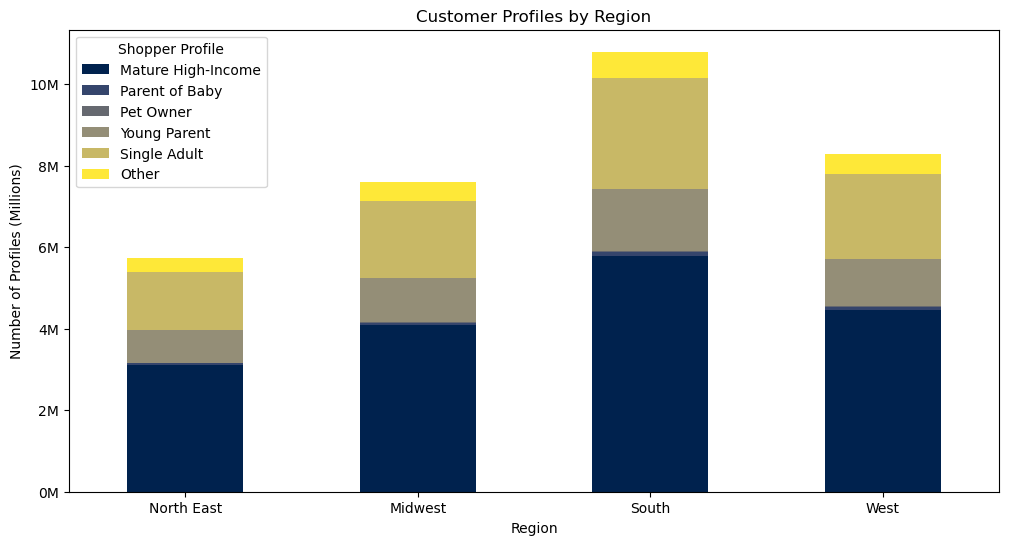

In [521]:
stacked_bar.figure

In [523]:
# change legend
stacked_bar.legend(title='Shopper Profile')

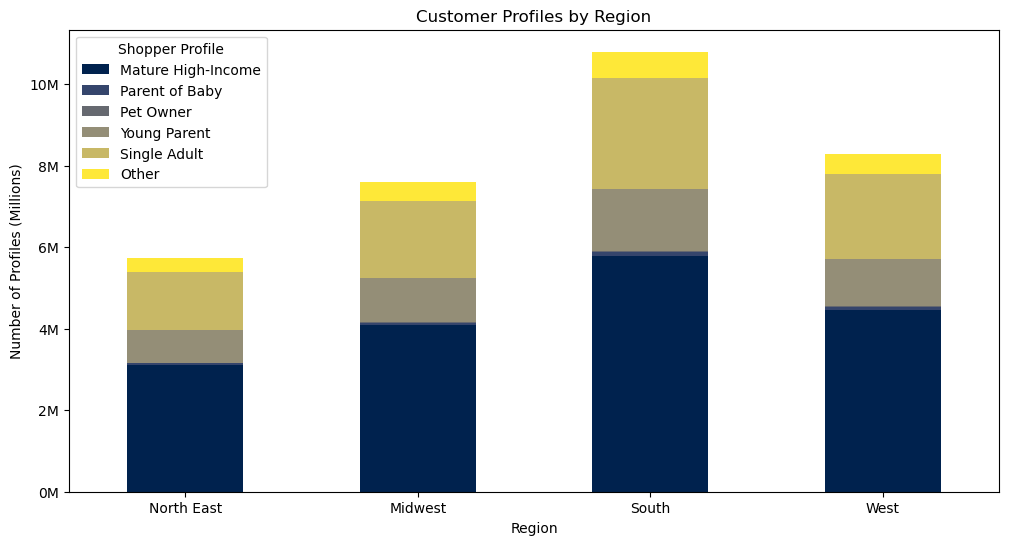

In [525]:
stacked_bar.figure

In [171]:
# set x-axis labels to be horizontal
labels = [label.get_text() for label in stacked_bar.get_xticklabels()]
stacked_bar.set_xticklabels(labels, rotation=0)

[Text(0, 0, 'Region 1'),
 Text(1, 0, 'Region 2'),
 Text(2, 0, 'Region 3'),
 Text(3, 0, 'Region 4')]

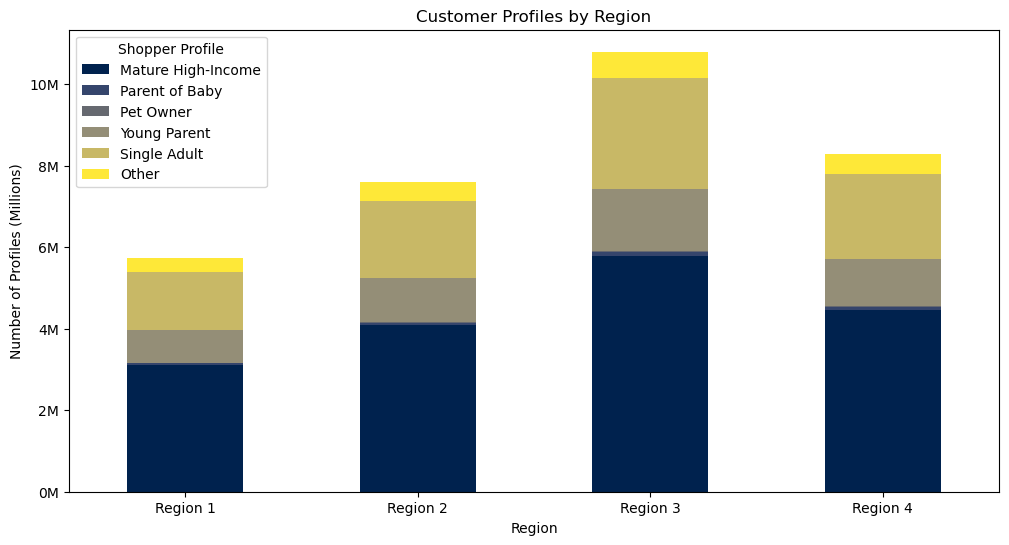

In [173]:
# quality check
stacked_bar.figure

In [527]:
# export stacked_bar
stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Profiles by Region.png'))

# Visualization #2

In [183]:
# getting values of each shopper profile by department_id
shopper_profile_by_department_id = df.groupby('department_id')['shopper_profile'].value_counts().unstack().fillna(0)

In [185]:
shopper_profile_by_department_id

shopper_profile,Young Low-Income,Mature High-Income,Parent of Baby,Pet Owner,Young Parent,Single Adult,Married Adult No Kids,Other
department_id,,,,,,,,
1,0,1232211,0,0,317795,557160,0,127576
2,0,19460,0,0,5463,9175,0,2193
3,0,649243,0,0,165686,294405,0,63094
4,0,5285902,0,0,1331525,2375445,0,486417
5,0,80398,0,0,22913,39118,0,11267
6,0,150674,0,0,38392,67713,0,12474
7,0,1412223,0,0,373613,674442,0,227845
8,0,0,0,58715,14418,24583,0,0
9,0,490054,0,0,123414,215262,0,37897


In [189]:
filtered_shopper_profile_by_department_id = shopper_profile_by_department_id.drop(columns=['Young Low-Income', 'Married Adult No Kids'])

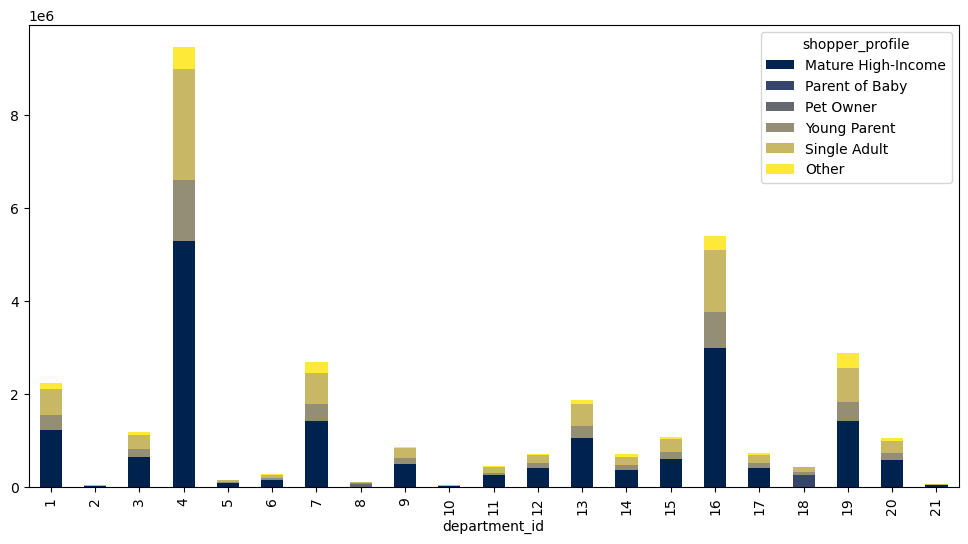

In [205]:
# stacked by chart for shopper_profile_by_department_id
stacked_bar_2 = filtered_shopper_profile_by_department_id.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='cividis', 
    ax=plt.gca())

In [207]:
# remove scientific notation
stacked_bar_2.ticklabel_format(style='plain', axis='y')

In [209]:
# setting y-axis
y_ticks_2 = stacked_bar_2.get_yticks()

In [211]:
stacked_bar_2.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks_2])

C:\Users\lisag\AppData\Local\Temp\ipykernel_13184\92119059.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  stacked_bar_2.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks_2])


[Text(0, 0.0, '0M'),
 Text(0, 2000000.0, '2M'),
 Text(0, 4000000.0, '4M'),
 Text(0, 6000000.0, '6M'),
 Text(0, 8000000.0, '8M'),
 Text(0, 10000000.0, '10M')]

In [213]:
# add labels and titles
stacked_bar_2.set_xlabel('Department ID')
stacked_bar_2.set_ylabel('Number of Profiles (Millions)')
stacked_bar_2.set_title('Customer Profiles by Department ID')

Text(0.5, 1.0, 'Customer Profiles by Department ID')

In [223]:
# change legend
stacked_bar_2.legend(title='Shopper Profile')

In [227]:
# set x-axis labels to be horizontal
labels_2 = [label.get_text() for label in stacked_bar_2.get_xticklabels()]
stacked_bar_2.set_xticklabels(labels_2, rotation=0)

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21')]

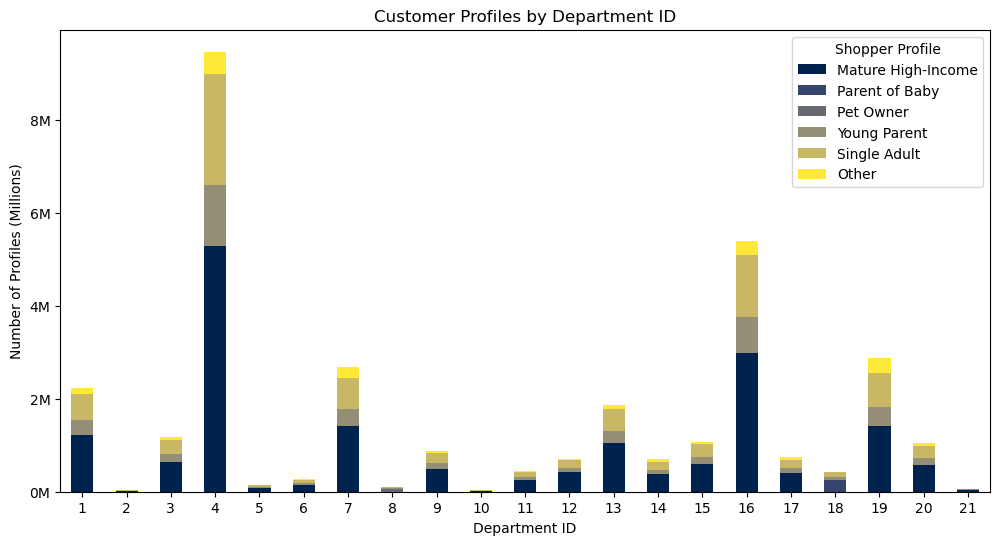

In [229]:
# quality check
stacked_bar_2.figure

In [507]:
# exporting stacked_bar_2
stacked_bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Profiles by Department ID.png'))

# Visualization #3

In [236]:
# creating a random sample 70/30
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [238]:
# store 70% of sample in big dataframe
big = df[dev]

In [240]:
# store 30% of sample in small dataframe
small = df[~dev]

In [242]:
# creating a specific small dataframe for line graph
df_small = small[['Age', 'n_dependants']]

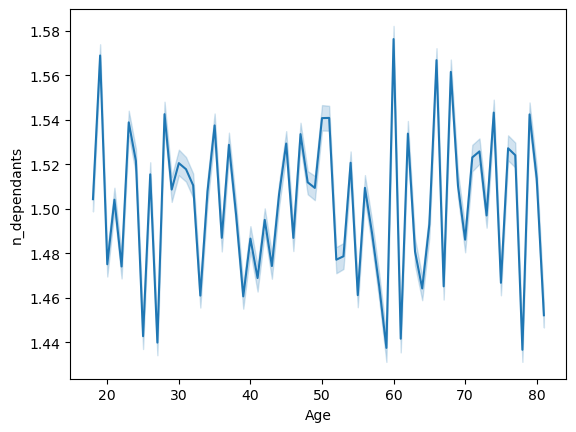

In [246]:
# creating a sample line graph
line = sns.lineplot(data = df_small, x = 'Age', y = 'n_dependants')

In [248]:
# set y-axis ticks to whole numbers
line.set_yticks(range(0, df_small['n_dependants'].max() + 1))

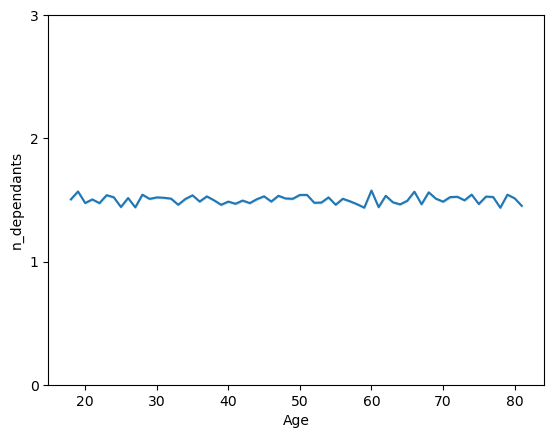

In [250]:
line.figure

In [252]:
# add labels and titles
line.set_xlabel('Age')
line.set_ylabel('Number of Dependants')
line.set_title('Number of Dependants by Age of Customer')

Text(0.5, 1.0, 'Number of Dependants by Age of Customer')

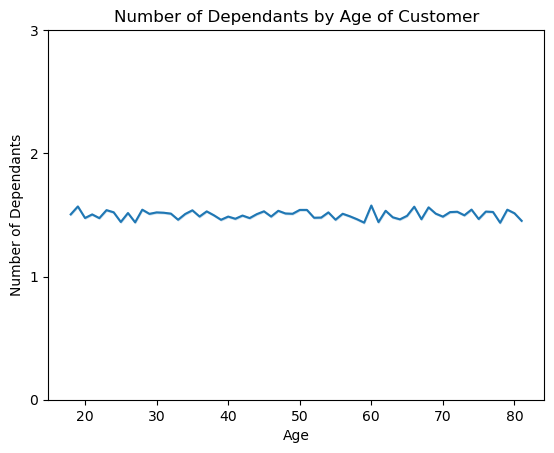

In [254]:
# quality check
line.figure

In [256]:
# export line
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Dependants by Age.png'))

# Visualization #4

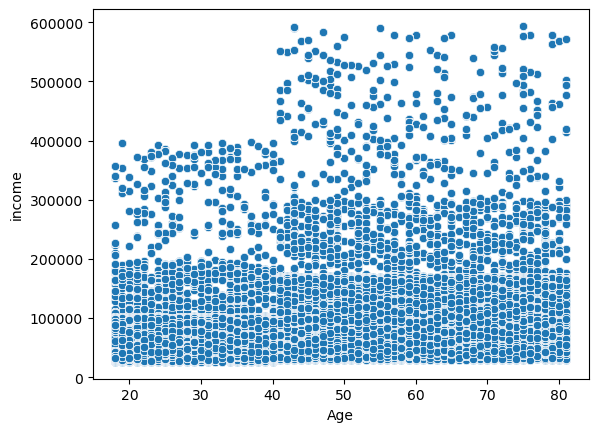

In [260]:
# scatterplot creation
scatter = sns.scatterplot(x = 'Age', y = 'income', data = df)

In [280]:
# add labels and titles
scatter.set_xlabel('Age')
scatter.set_ylabel('Income (US Dollars)')
scatter.set_title('Income by Age')

Text(0.5, 1.0, 'Income by Age')

In [274]:
import matplotlib.ticker as mtick

In [282]:
# Apply ScalarFormatter to remove scientific notation
formatter = mtick.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)  # Turn off scientific notation
formatter.set_useOffset(False)   # Turn off axis offset
scatter.yaxis.set_major_formatter(formatter)

In [284]:
# setting y-axis
y_ticks_3 = scatter.get_yticks()
scatter.set_yticklabels([f'{int(tick/1e3)}K' for tick in y_ticks_3])

C:\Users\lisag\AppData\Local\Temp\ipykernel_13184\1955090117.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter.set_yticklabels([f'{int(tick/1e3)}K' for tick in y_ticks_3])


[Text(0, -100000.0, '-100K'),
 Text(0, 0.0, '0K'),
 Text(0, 100000.0, '100K'),
 Text(0, 200000.0, '200K'),
 Text(0, 300000.0, '300K'),
 Text(0, 400000.0, '400K'),
 Text(0, 500000.0, '500K'),
 Text(0, 600000.0, '600K'),
 Text(0, 700000.0, '700K')]

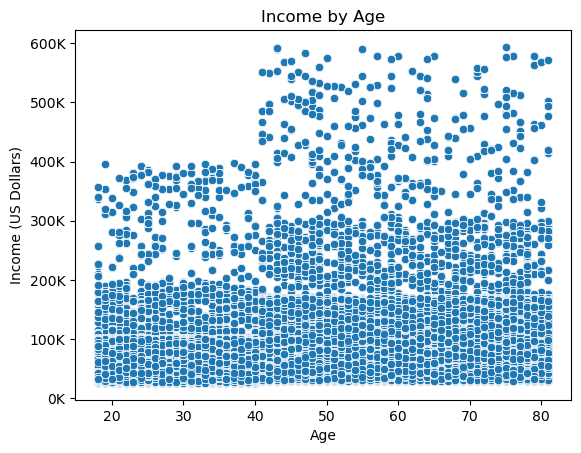

In [286]:
# quality check
scatter.figure

In [288]:
# exporting scatter
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income by Age.png'))

# Visualization #5

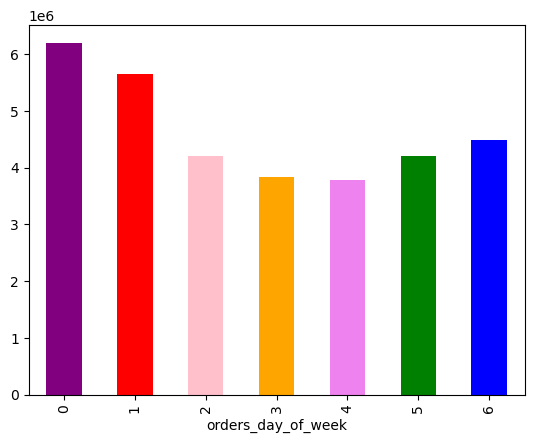

In [315]:
# creating a bar chart
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'violet', 'green', 'blue'])

In [317]:
# remove scientific notation
bar.ticklabel_format(style='plain', axis='y')

In [319]:
# setting y-axis
y_ticks_4 = bar.get_yticks()
bar.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks_4])

C:\Users\lisag\AppData\Local\Temp\ipykernel_13184\3319387833.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks_4])


[Text(0, 0.0, '0M'),
 Text(0, 1000000.0, '1M'),
 Text(0, 2000000.0, '2M'),
 Text(0, 3000000.0, '3M'),
 Text(0, 4000000.0, '4M'),
 Text(0, 5000000.0, '5M'),
 Text(0, 6000000.0, '6M'),
 Text(0, 7000000.0, '7M')]

In [321]:
# add labels and titles
bar.set_xlabel('Day of Week')
bar.set_ylabel('Number of Orders (Millions)')
bar.set_title('Number of Orders by Day of Week')

Text(0.5, 1.0, 'Number of Orders by Day of Week')

In [323]:
# set x-axis labels to be horizontal
labels_3 = [label.get_text() for label in bar.get_xticklabels()]
bar.set_xticklabels(labels_3, rotation=0)

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

In [325]:
# changing numbers to days of week
bar.set_xticks(range(7))  # Set positions of the ticks (0 to 6)
bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Monday'),
 Text(3, 0, 'Tuesday'),
 Text(4, 0, 'Wednesday'),
 Text(5, 0, 'Thursday'),
 Text(6, 0, 'Friday')]

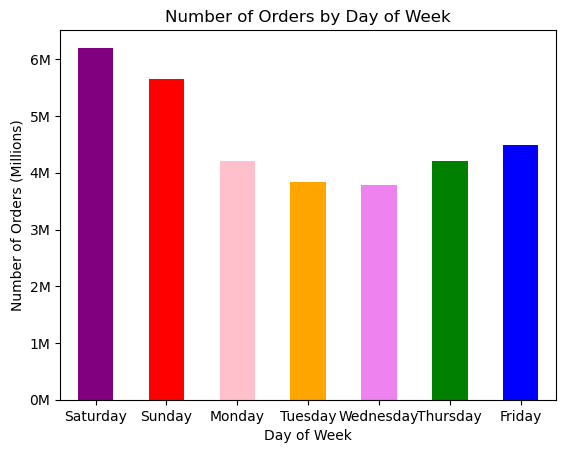

In [327]:
# quality check
bar.figure

In [329]:
# exporting bar
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Orders by Day of Week.png'))

# Visualization #6

In [332]:
# creating a specific small dataframe for line graph
df_small_2 = small[['orders_day_of_week', 'prices']]

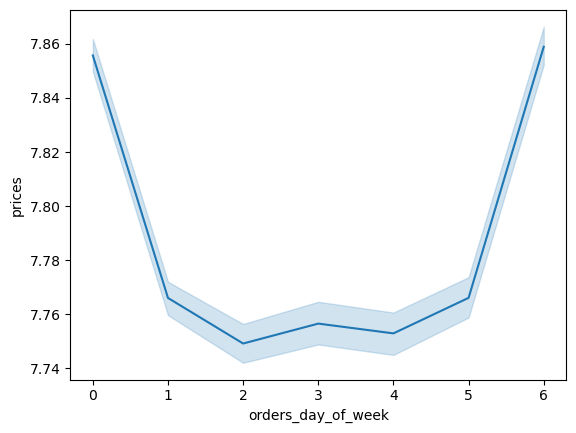

In [334]:
# creating a line graph
line_2 = sns.lineplot(data = df_small_2, x = 'orders_day_of_week', y = 'prices')

In [338]:
# add labels and titles
line_2.set_xlabel('Day of Week')
line_2.set_ylabel('Average Product Price (US Dollars)')
line_2.set_title('Average Cost of Products Purchased by Day of Week')

Text(0.5, 1.0, 'Average Cost of Products Purchased by Day of Week')

In [340]:
# set x-axis labels to be horizontal
labels_4 = [label.get_text() for label in line_2.get_xticklabels()]
line_2.set_xticklabels(labels_4, rotation=0)

C:\Users\lisag\AppData\Local\Temp\ipykernel_13184\49390388.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line_2.set_xticklabels(labels_4, rotation=0)


[Text(-1.0, 0, '−1'),
 Text(0.0, 0, '0'),
 Text(1.0, 0, '1'),
 Text(2.0, 0, '2'),
 Text(3.0, 0, '3'),
 Text(4.0, 0, '4'),
 Text(5.0, 0, '5'),
 Text(6.0, 0, '6'),
 Text(7.0, 0, '7')]

In [346]:
# changing numbers to days of week
line_2.set_xticks(range(7))  # Set positions of the ticks (0 to 6)
line_2.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Monday'),
 Text(3, 0, 'Tuesday'),
 Text(4, 0, 'Wednesday'),
 Text(5, 0, 'Thursday'),
 Text(6, 0, 'Friday')]

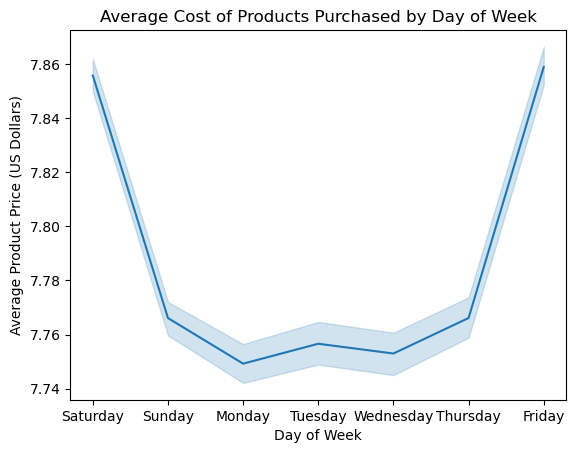

In [348]:
# quality check
line_2.figure

In [350]:
# exporting line_2
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Cost of Product Day of Week.png'))

# Visualization #7

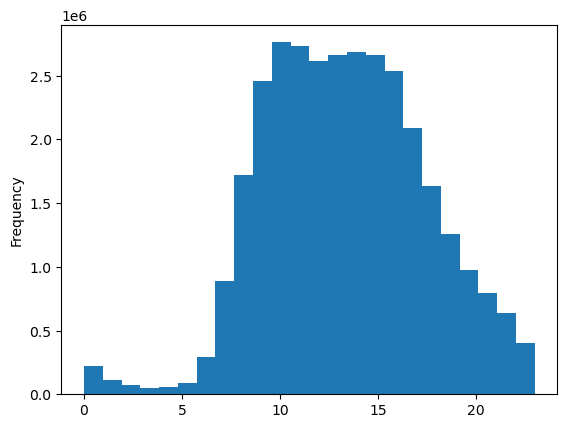

In [421]:
# histogram creation
hist = df['order_time_24hour'].plot.hist(bins = 24)

In [423]:
# remove scientific notation
hist.ticklabel_format(style='plain', axis='y')

In [425]:
# setting y-axis
y_ticks_5 = hist.get_yticks()
hist.set_yticklabels([f'{tick/1e6:.1f}M' for tick in y_ticks_5])

C:\Users\lisag\AppData\Local\Temp\ipykernel_13184\639738905.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_yticklabels([f'{tick/1e6:.1f}M' for tick in y_ticks_5])


[Text(0, 0.0, '0.0M'),
 Text(0, 500000.0, '0.5M'),
 Text(0, 1000000.0, '1.0M'),
 Text(0, 1500000.0, '1.5M'),
 Text(0, 2000000.0, '2.0M'),
 Text(0, 2500000.0, '2.5M'),
 Text(0, 3000000.0, '3.0M')]

In [427]:
# add labels and titles
hist.set_xlabel('Hour of Day (24 Hours)')
hist.set_ylabel('Number of Orders')
hist.set_title('Popularity of Orders by Time of Day')

Text(0.5, 1.0, 'Popularity of Orders by Time of Day')

In [429]:
# adding differentiating colors
bars = hist.patches

In [431]:
colors = ['blue', 'navy']

In [433]:
# applying alternating colors
for i, bar in enumerate(bars):
    bar.set_facecolor(colors[i % len(colors)])

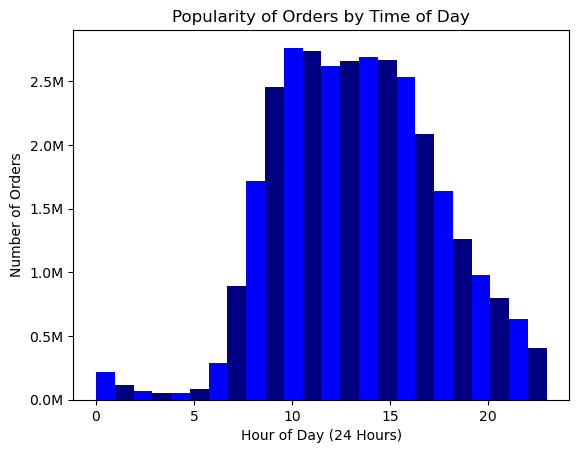

In [435]:
# quality check
hist.figure

In [437]:
# exporting hist
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Popularity of Orders by Time of Day.png'))

# Visualization #8

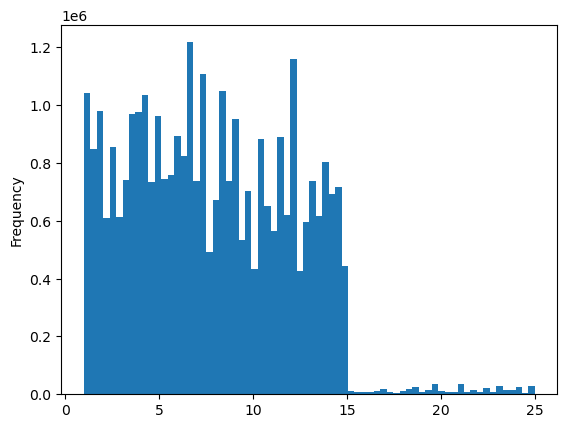

In [442]:
# histogram creation
hist_2 = df['prices'].plot.hist(bins = 70)

In [444]:
# remove scientific notation
hist_2.ticklabel_format(style='plain', axis='y')

In [446]:
# setting y-axis
y_ticks_6 = hist_2.get_yticks()
hist_2.set_yticklabels([f'{tick/1e6:.1f}M' for tick in y_ticks_6])

C:\Users\lisag\AppData\Local\Temp\ipykernel_13184\3330367766.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist_2.set_yticklabels([f'{tick/1e6:.1f}M' for tick in y_ticks_6])


[Text(0, 0.0, '0.0M'),
 Text(0, 200000.0, '0.2M'),
 Text(0, 400000.0, '0.4M'),
 Text(0, 600000.0, '0.6M'),
 Text(0, 800000.0, '0.8M'),
 Text(0, 1000000.0, '1.0M'),
 Text(0, 1200000.0, '1.2M'),
 Text(0, 1400000.0, '1.4M')]

In [448]:
# add labels and titles
hist_2.set_xlabel('Price of Products (US Dollars)')
hist_2.set_ylabel('Number of Products')
hist_2.set_title('Number of Products by Price')

Text(0.5, 1.0, 'Number of Products by Price')

In [450]:
# adding differentiating colors
bars = hist_2.patches

In [452]:
# applying alternating colors
for i, bar in enumerate(bars):
    bar.set_facecolor(colors[i % len(colors)])

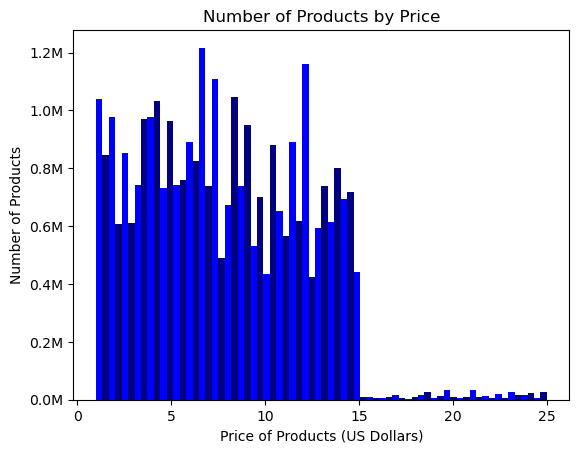

In [454]:
# quality check
hist_2.figure

In [456]:
# exporting hist_2
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Number of Products by Price.png'))

# Visualization #9

In [466]:
crosstab = pd.crosstab(df['department_id'], df['max_order'].sum(), dropna = False)

In [468]:
crosstab = crosstab.reset_index()

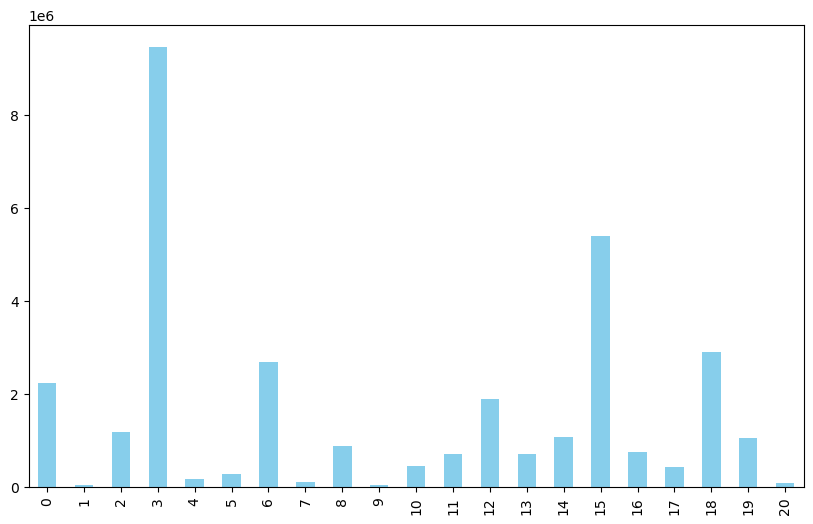

In [470]:
# bar chart creation
bar_2 = crosstab.sum(axis=1).plot.bar(color='skyblue', figsize=(10, 6))

In [472]:
# remove scientific notation
bar_2.ticklabel_format(style='plain', axis='y')

In [474]:
# setting y-axis
y_ticks_7 = bar_2.get_yticks()
bar_2.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks_7])

C:\Users\lisag\AppData\Local\Temp\ipykernel_13184\2850697716.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_2.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks_7])


[Text(0, 0.0, '0M'),
 Text(0, 2000000.0, '2M'),
 Text(0, 4000000.0, '4M'),
 Text(0, 6000000.0, '6M'),
 Text(0, 8000000.0, '8M'),
 Text(0, 10000000.0, '10M')]

In [476]:
# set x-axis labels to be horizontal
labels_5 = [label.get_text() for label in bar_2.get_xticklabels()]
bar_2.set_xticklabels(labels_5, rotation=0)

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20')]

In [478]:
# add labels and titles
bar_2.set_xlabel('Department ID')
bar_2.set_ylabel('Sum of Max Orders')
bar_2.set_title('Number of Orders by Department')

Text(0.5, 1.0, 'Number of Orders by Department')

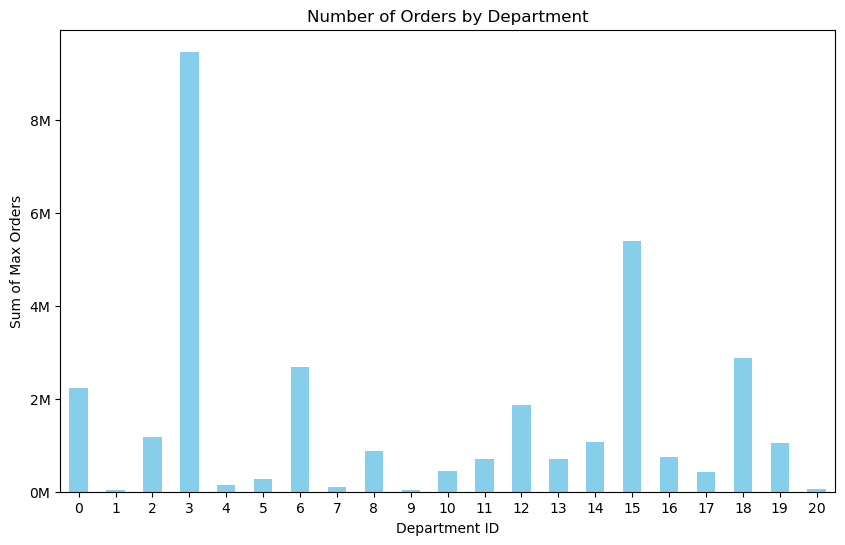

In [480]:
# quality check
bar_2.figure

In [482]:
# exporting bar_2
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Number of Orders by Department.png'))

# Visualization #10

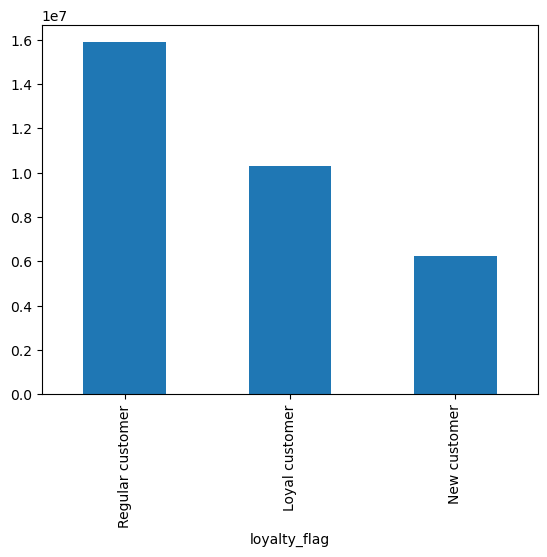

In [485]:
# bar chart creation
bar_3 = df['loyalty_flag'].value_counts().plot.bar()

In [489]:
# remove scientific notation
bar_3.ticklabel_format(style='plain', axis='y')

In [491]:
# setting y-axis
y_ticks_8 = bar_3.get_yticks()
bar_3.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks_8])

C:\Users\lisag\AppData\Local\Temp\ipykernel_13184\3493219829.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_3.set_yticklabels([f'{int(tick/1e6)}M' for tick in y_ticks_8])


[Text(0, 0.0, '0M'),
 Text(0, 2000000.0, '2M'),
 Text(0, 4000000.0, '4M'),
 Text(0, 6000000.0, '6M'),
 Text(0, 8000000.0, '8M'),
 Text(0, 10000000.0, '10M'),
 Text(0, 12000000.0, '12M'),
 Text(0, 14000000.0, '14M'),
 Text(0, 16000000.0, '16M'),
 Text(0, 18000000.0, '18M')]

In [493]:
# set x-axis labels to be horizontal
labels_6 = [label.get_text() for label in bar_3.get_xticklabels()]
bar_3.set_xticklabels(labels_6, rotation=0)

[Text(0, 0, 'Regular customer'),
 Text(1, 0, 'Loyal customer'),
 Text(2, 0, 'New customer')]

In [509]:
# add labels and titles
bar_3.set_xlabel('Loyalty Status')
bar_3.set_ylabel('Number of Customers')
bar_3.set_title('Number of Customers by Loyalty Levels')

Text(0.5, 1.0, 'Number of Customers by Loyalty Levels')

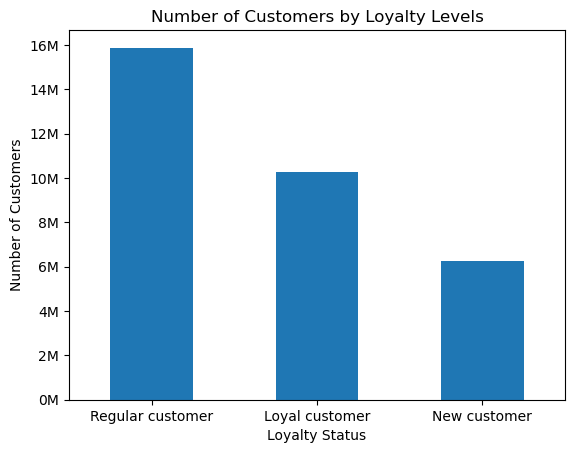

In [511]:
# quality check
bar_3.figure

In [513]:
# exporting bar_3
bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Loyalty.png'))